<a href="https://colab.research.google.com/github/KARENCMP82/SQL/blob/main/Clase_10Recursos_SQL_Joins_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

import sqlite3
import pandas as pd

In [9]:

database = '/content/drive/MyDrive/Colab Notebooks/consultas_avanzadas.db'

In [10]:
import os
os.makedirs('/content/drive/MyDrive/Colab Notebooks', exist_ok=True)

In [11]:
import sqlite3

# Ruta a la base de datos
database = '/content/drive/MyDrive/Colab Notebooks/consultas_avanzadas.db'

# Crear o conectar a la base de datos
conexion = sqlite3.connect(database)
cursor = conexion.cursor()

print("Base de datos creada o abierta con éxito.")


Base de datos creada o abierta con éxito.


In [12]:
#vamos a repasar las tablas de la base de datos
query='''
select name from sqlite_master where type='table' and name not like 'sqlite_%';
'''
cursor.execute(query)
cursor.fetchall()

[('canales',),
 ('clientes',),
 ('productos',),
 ('sucursales',),
 ('vendedores',),
 ('ventas',)]

In [19]:
#VER CADA UNA DE LAS TABLAS
# Consulta SQL
query = "SELECT * FROM ventas;"

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)
cursor.execute(query)
cursor.fetchall()

    ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  \
0                1        2021-08-15         1        20005            2   
1                2        2021-08-15         1        20005            2   
2                3        2021-08-15         1        20007            2   
3                4        2021-08-16         1        20007            2   
4                5        2021-08-17         1        20005            2   
5                6        2021-08-18         1        20002            2   
6                7        2021-08-19         1        20004            3   
7                8        2021-08-20         1        20003            3   
8                9        2021-08-21         1        20007            3   
9               10        2021-08-22         2        20001            3   
10              11        2021-08-23         2        20005            3   
11              12        2021-08-24         2        20005            2   
12          

[(1, '2021-08-15', 1, 20005, 2, 311, 100001),
 (2, '2021-08-15', 1, 20005, 2, 311, 100001),
 (3, '2021-08-15', 1, 20007, 2, 311, 100001),
 (4, '2021-08-16', 1, 20007, 2, 312, 100003),
 (5, '2021-08-17', 1, 20005, 2, 313, 100020),
 (6, '2021-08-18', 1, 20002, 2, 314, 100020),
 (7, '2021-08-19', 1, 20004, 3, 315, 100018),
 (8, '2021-08-20', 1, 20003, 3, 316, 100005),
 (9, '2021-08-21', 1, 20007, 3, 317, 100008),
 (10, '2021-08-22', 2, 20001, 3, 318, 100003),
 (11, '2021-08-23', 2, 20005, 3, 319, 100008),
 (12, '2021-08-24', 2, 20005, 2, 320, 100020),
 (13, '2021-08-25', 2, 20004, 2, 321, 100020),
 (14, '2021-08-26', 2, 20008, 2, 322, 100010),
 (15, '2021-08-27', 2, 20007, 2, 323, 100005),
 (16, '2021-08-28', 1, 20002, 3, 324, 100001),
 (17, '2021-08-29', 1, 20006, 3, 325, 100009),
 (18, '2021-08-30', 1, 20008, 3, 326, 100009),
 (19, '2021-08-31', 1, 20007, 2, 327, 100016),
 (20, '2021-09-01', 1, 20008, 2, 328, 100017),
 (21, '2021-09-02', 1, 20008, 2, 329, 100010),
 (22, '2021-09-02', 2,

--TABLA-- **canales** --COLUMNAS-- ID_CANAL DESC_CANAL

--TABLA-- **clientes** --COLUMNAS--   ID_CLIENTE    NOMBRE   APELLIDO  EDAD     PROVINCIA  FECHA_ALTA


--TABLA-- **productos** --COLUMNAS-- ID_PRODUCTO   NOMBRE_PRODUCTO CATEG_PRODUCTO  IMPORTE MARGEN

--TABLA-- **sucursales** --COLUMNAS-- ID_SUCURSAL         NOMBRE                  DIRECCION  CENTRO_DE_COSTO

--TABLA-- **vendedores** --COLUMNAS-- ID_VENDEDOR  NOMBRE APELLIDO  ID_SUCURSALES

--TABLA-- **ventas** --COLUMNAS-- ID_TRANSACCION FECHA_TRANSACCION  ID_CANAL  ID_PRODUCTO  ID_VENDEDOR  COMANDA  ID_CLIENTE

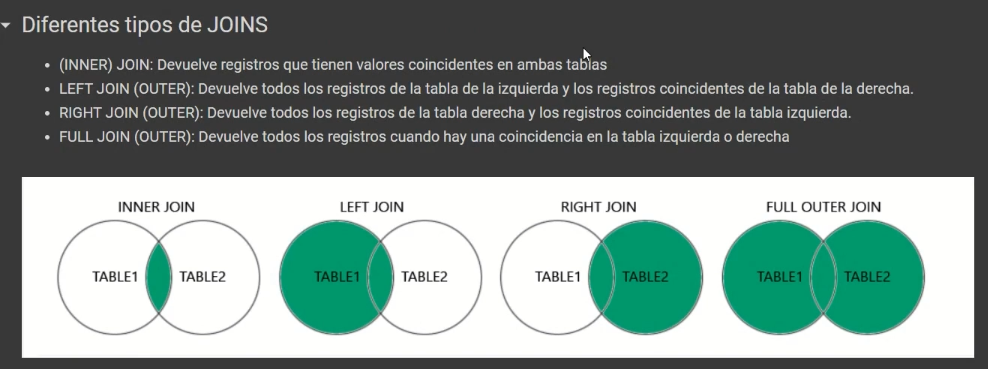

In [20]:
#INNER JOIN
# Consulta SQL
query = '''
-- Selecciona todas las columnas de las tablas vendedores y ventas
SELECT
TV.*, TVE.*
FROM
vendedores TV -- Alias para la tabla vendedores
INNER JOIN VENTAS TVE -- Combina con la tabla ventas
ON TV.ID_VENDEDOR = TVE.ID_VENDEDOR; -- Condición de unión: ID_VENDEDOR debe coincidir

# Leer los datos en un DataFrame de pandas
data = pd.read_sql_query(query, conexion)

# Mostrar los datos
print(data)
cursor.execute(query)
cursor.fetchall()

    ID_VENDEDOR  NOMBRE APELLIDO  ID_SUCURSALES  ID_TRANSACCION  \
0             2    JUAN   CASTRO              2               1   
1             2    JUAN   CASTRO              2               2   
2             2    JUAN   CASTRO              2               3   
3             2    JUAN   CASTRO              2               4   
4             2    JUAN   CASTRO              2               5   
5             2    JUAN   CASTRO              2               6   
6             2    JUAN   CASTRO              2              12   
7             2    JUAN   CASTRO              2              13   
8             2    JUAN   CASTRO              2              14   
9             2    JUAN   CASTRO              2              15   
10            2    JUAN   CASTRO              2              19   
11            2    JUAN   CASTRO              2              20   
12            2    JUAN   CASTRO              2              21   
13            2    JUAN   CASTRO              2              2

[(2, 'JUAN', 'CASTRO', 2, 1, '2021-08-15', 1, 20005, 2, 311, 100001),
 (2, 'JUAN', 'CASTRO', 2, 2, '2021-08-15', 1, 20005, 2, 311, 100001),
 (2, 'JUAN', 'CASTRO', 2, 3, '2021-08-15', 1, 20007, 2, 311, 100001),
 (2, 'JUAN', 'CASTRO', 2, 4, '2021-08-16', 1, 20007, 2, 312, 100003),
 (2, 'JUAN', 'CASTRO', 2, 5, '2021-08-17', 1, 20005, 2, 313, 100020),
 (2, 'JUAN', 'CASTRO', 2, 6, '2021-08-18', 1, 20002, 2, 314, 100020),
 (2, 'JUAN', 'CASTRO', 2, 12, '2021-08-24', 2, 20005, 2, 320, 100020),
 (2, 'JUAN', 'CASTRO', 2, 13, '2021-08-25', 2, 20004, 2, 321, 100020),
 (2, 'JUAN', 'CASTRO', 2, 14, '2021-08-26', 2, 20008, 2, 322, 100010),
 (2, 'JUAN', 'CASTRO', 2, 15, '2021-08-27', 2, 20007, 2, 323, 100005),
 (2, 'JUAN', 'CASTRO', 2, 19, '2021-08-31', 1, 20007, 2, 327, 100016),
 (2, 'JUAN', 'CASTRO', 2, 20, '2021-09-01', 1, 20008, 2, 328, 100017),
 (2, 'JUAN', 'CASTRO', 2, 21, '2021-09-02', 1, 20008, 2, 329, 100010),
 (2, 'JUAN', 'CASTRO', 2, 22, '2021-09-02', 2, 20007, 2, 329, 100010),
 (2, 'JUAN',